<a href="https://colab.research.google.com/github/ulyazzh/capstone_bengkelkoding/blob/main/capstone/capstone3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [3]:
#membaca dataset
df = pd.read_csv('/content/ObesityDataSet.csv')

In [4]:
#menampilkan dataset
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
# Menampilkan info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [6]:
# Ubah ke tipe data numerik

# Kolom kontinu (float)
kontinu_cols = ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF']
for col in kontinu_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # ubah ke float, error jadi NaN

# Kolom integer
integer_cols = ['FCVC', 'TUE']
for col in integer_cols:
    df[col] = pd.to_numeric(df[col], downcast='integer', errors='coerce')

# Kolom biner (yes/no) atau 1/0 tetap object/categorical, bisa di-encode nanti
biner_cols = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

# Kolom kategorikal
kategorikal_cols = ['Gender', 'CAEC', 'CALC', 'MTRANS', 'NObeyesdad']

# memastikan kolom kategorikal ditandai sebagai kategori
for col in kategorikal_cols + biner_cols:
    df[col] = df[col].astype('category')

# Tampilkan kembali info setelah perubahan
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Age                             2089 non-null   float64 
 1   Gender                          2102 non-null   category
 2   Height                          2089 non-null   float64 
 3   Weight                          2092 non-null   float64 
 4   CALC                            2106 non-null   category
 5   FAVC                            2100 non-null   category
 6   FCVC                            2093 non-null   float64 
 7   NCP                             2089 non-null   float64 
 8   SCC                             2101 non-null   category
 9   SMOKE                           2106 non-null   category
 10  CH2O                            2096 non-null   float64 
 11  family_history_with_overweight  2098 non-null   category
 12  FAF                 

In [7]:
# menampilkan jumlah baris dan kolom
df.shape

(2111, 17)

In [8]:
# deskripsi data
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2089.000000,2089.000000,2092.000000,2093.000000,2089.000000,2096.000000,2092.000000,2096.000000
mean,24.717928,1.706623,88.608184,2.443519,2.729418,2.030560,1.073435,0.680138
std,8.391323,0.117700,36.154617,0.642754,0.981124,0.737945,1.149364,0.717160
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.955257,1.630000,66.000000,2.000000,2.675411,1.569911,0.129009,0.000000
50%,22.814657,1.701284,83.000000,2.397284,3.000000,2.000000,1.000000,0.625360
75%,26.000000,1.770000,108.055736,3.000000,3.000000,2.482454,1.683612,1.000000
max,106.441252,2.853986,441.131078,8.706795,12.299828,9.233294,12.270275,7.669504


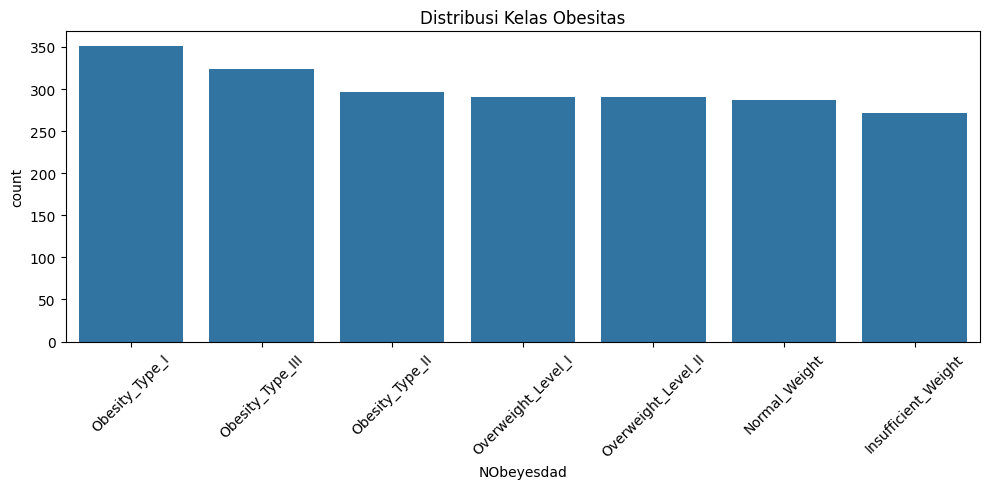

In [9]:
#menampilkan visualisasi distribusi kelas obesitas
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.title("Distribusi Kelas Obesitas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

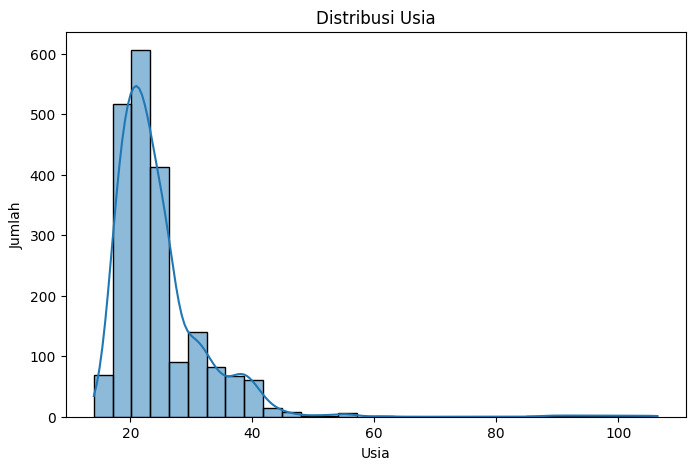

In [10]:
#menampilkan distribusi usia
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Distribusi Usia")
plt.xlabel("Usia")
plt.ylabel("Jumlah")
plt.show()


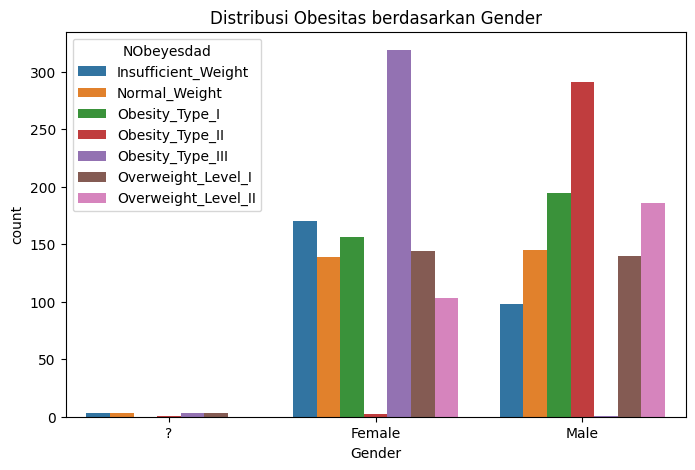

In [11]:
# Visualisasi gender vs tingkat obesitas
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='NObeyesdad', data=df)
plt.title("Distribusi Obesitas berdasarkan Gender")
plt.show()

In [12]:
#cek missing value
df.isnull().sum()

,0
Age,22
Gender,9
Height,22
Weight,19
CALC,5
FAVC,11
FCVC,18
NCP,22
SCC,10
SMOKE,5


In [13]:
df[df.isnull().any(axis=1)]

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
19,23.000000,Female,1.650000,70.000000,Sometimes,no,2.0,1.0,no,no,2.000000,yes,0.000000,NaN,Sometimes,Public_Transportation,Overweight_Level_I
33,39.000000,Male,1.790000,NaN,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
64,21.000000,Female,1.660000,NaN,no,yes,2.0,3.0,no,no,1.000000,yes,1.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
67,23.000000,Male,1.650000,95.000000,Frequently,yes,2.0,NaN,no,no,2.000000,yes,0.000000,1.000000,Always,Automobile,Obesity_Type_I
69,23.000000,Male,1.800000,60.000000,Sometimes,no,NaN,3.0,no,no,3.000000,yes,0.000000,1.000000,no,Public_Transportation,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064,20.978166,Female,1.721057,132.054793,Sometimes,yes,3.0,3.0,no,no,1.678791,yes,NaN,0.818871,Sometimes,Public_Transportation,Obesity_Type_III
2067,23.647935,Female,1.681394,114.479459,Sometimes,yes,3.0,3.0,NaN,no,2.435978,yes,0.232742,0.692608,Sometimes,Public_Transportation,Obesity_Type_III
2080,NaN,Female,1.741925,133.017105,Sometimes,yes,3.0,3.0,no,no,2.474518,yes,1.560261,0.662489,Sometimes,Public_Transportation,Obesity_Type_III
2085,25.986368,Female,1.668951,112.249699,Sometimes,yes,3.0,3.0,no,no,2.930137,yes,NaN,0.138629,Sometimes,Public_Transportation,Obesity_Type_III


In [14]:
# Pisahkan kolom berdasarkan tipe
num_cols = ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF']
int_cols = ['FCVC', 'TUE']
cat_cols = ['Gender', 'CAEC', 'CALC', 'MTRANS', 'NObeyesdad']
bin_cols = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

In [15]:
# Imputasi nilai numerik kontinu dengan median
imputer_num = SimpleImputer(strategy='median')
df[num_cols] = imputer_num.fit_transform(df[num_cols])

In [16]:
# Imputasi nilai integer dengan modus
imputer_int = SimpleImputer(strategy='most_frequent')
df[int_cols] = imputer_int.fit_transform(df[int_cols])

In [17]:
# Imputasi nilai kategorikal dan biner dengan modus
for col in cat_cols + bin_cols:
    imputer_cat = SimpleImputer(strategy='most_frequent')
    df[[col]] = imputer_cat.fit_transform(df[[col]])

In [18]:
df.isnull().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


karena missing value sudah teratasi, jumlah data tiap kolom sudah sama semua

In [19]:
#mengecek data duplikat
print(df.duplicated().sum())

19


In [20]:
#hapus data duplikay
df.drop_duplicates(inplace=True)

#cek ulang data duplikat
print(df.duplicated().sum())

0


In [21]:
#Cek keseimbangan data (distribusi label target)
(df['NObeyesdad'].value_counts())


,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_II,290
Normal_Weight,285
Overweight_Level_I,276
Insufficient_Weight,269


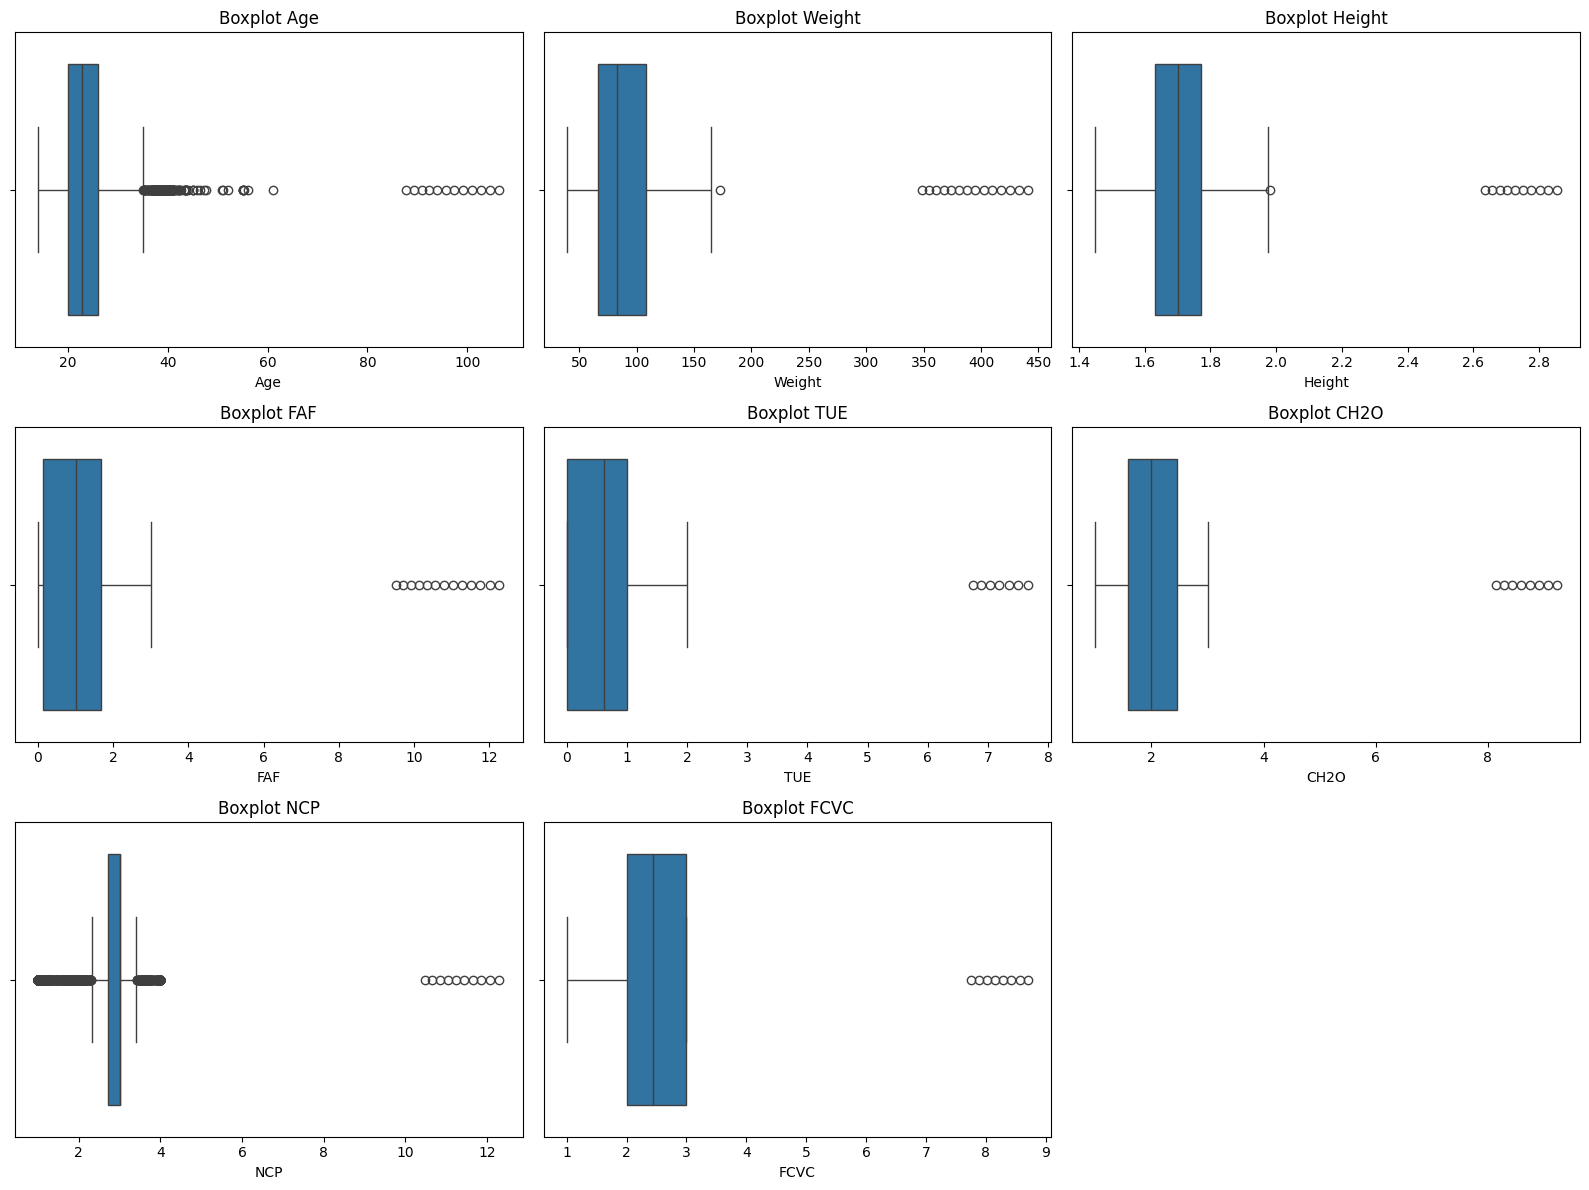

In [22]:
#deteksi outlier dengan boxplot
numeric_cols = ['Age', 'Weight', 'Height', 'FAF', 'TUE', 'CH2O', 'NCP', 'FCVC']

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot {col}")
    plt.tight_layout()

plt.show()


In [23]:
#ubah data kategori ke numerik
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
categorical_cols = ['Gender', 'CAEC', 'CALC', 'MTRANS', 'NObeyesdad']
for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])


In [24]:
#buang kolom yang redundan/tidak variatif
X = df.drop('NObeyesdad', axis=1)  # Fitur
y = df['NObeyesdad']               # Target


In [25]:
#menangani outliers dengan
for col in numeric_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
  df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

In [26]:
from sklearn.preprocessing import LabelEncoder

# Salin dataset sebelum SMOTE
df_encoded = df.copy()

# Kolom yang harus di-label encoding
label_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
              'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Label Encoding untuk kolom biner dan kategorikal
le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Encoding target (NObeyesdad)
df_encoded['NObeyesdad'] = le.fit_transform(df_encoded['NObeyesdad'])

# Pisahkan fitur dan target
X = df_encoded.drop('NObeyesdad', axis=1)
y = df_encoded['NObeyesdad']


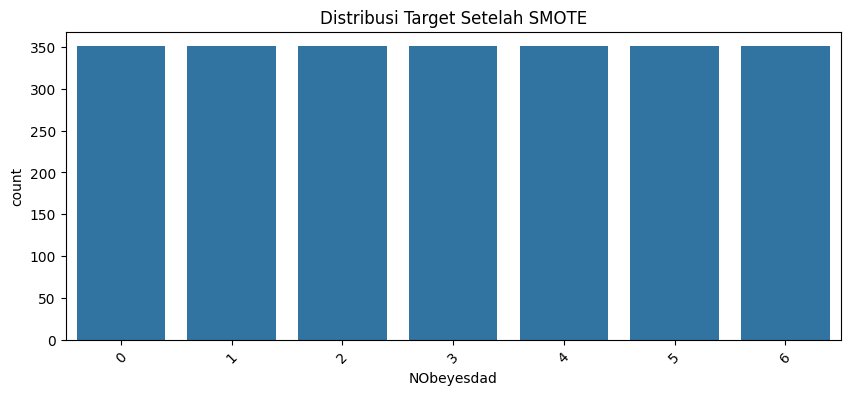

In [27]:
#atasi ketidakseimbangan kelas data
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Cek distribusi baru
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.countplot(x=y_res)
plt.title("Distribusi Target Setelah SMOTE")
plt.xticks(rotation=45)
plt.show()


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)


**Kesimpulan Preprocessing**

- Dataset awal memiliki missing values dan duplikasi, telah dibersihkan.
- Kolom kategorikal telah diencoding menggunakan LabelEncoder.
- Ketidakseimbangan kelas berhasil diatasi dengan SMOTE.
- Dataset telah dinormalisasi menggunakan StandardScaler agar siap untuk pemodelan.


## **PEMODELAN**

In [29]:
# Import library klasifikasi dan evaluasi
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Inisialisasi model
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

In [54]:
# Pisahkan fitur dan label
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']


In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

# Encode target label juga jika masih string
if y.dtype == 'object':
    y = le.fit_transform(y)


In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [57]:
# Dictionary untuk menyimpan hasil evaluasi
results = {
    "Model": [],
    "Akurasi": [],
    "Presisi": [],
    "Recall": [],
    "F1-Score": []
}

Akurasi: 0.7995226730310262
=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        54
           1       0.81      0.61      0.70        57
           2       0.74      0.96      0.83        70
           3       0.98      0.92      0.95        60
           4       0.98      0.95      0.97        65
           5       0.67      0.47      0.55        55
           6       0.57      0.71      0.63        58

    accuracy                           0.80       419
   macro avg       0.81      0.79      0.79       419
weighted avg       0.81      0.80      0.80       419

Decision Tree - Akurasi Training: 0.83 | Akurasi Testing: 0.80


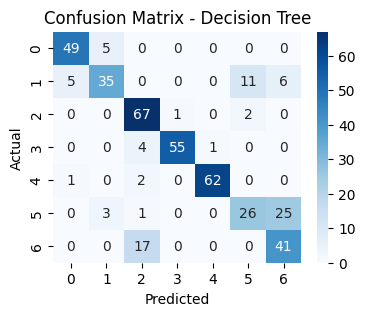

Akurasi: 0.9498806682577565
=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       0.86      0.96      0.91        57
           2       0.94      0.96      0.95        70
           3       1.00      0.98      0.99        60
           4       1.00      0.98      0.99        65
           5       0.89      0.91      0.90        55
           6       0.96      0.90      0.93        58

    accuracy                           0.95       419
   macro avg       0.95      0.95      0.95       419
weighted avg       0.95      0.95      0.95       419

Random Forest - Akurasi Training: 1.00 | Akurasi Testing: 0.95


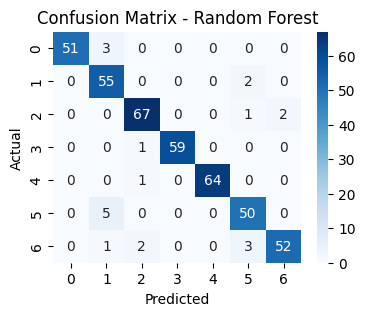

Akurasi: 0.8353221957040573
=== KNN ===
              precision    recall  f1-score   support

           0       0.80      0.98      0.88        54
           1       0.93      0.46      0.61        57
           2       0.87      0.87      0.87        70
           3       0.93      0.93      0.93        60
           4       0.94      0.94      0.94        65
           5       0.74      0.82      0.78        55
           6       0.70      0.83      0.76        58

    accuracy                           0.84       419
   macro avg       0.84      0.83      0.82       419
weighted avg       0.85      0.84      0.83       419

KNN - Akurasi Training: 0.89 | Akurasi Testing: 0.84


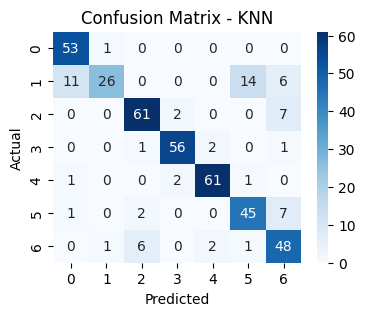

In [58]:
# Melatih dan mengevaluasi masing-masing model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluasi metrik
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    print("Akurasi:", accuracy_score(y_test, y_pred))
    results["Model"].append(name)
    results["Akurasi"].append(acc)
    results["Presisi"].append(prec)
    results["Recall"].append(rec)
    results["F1-Score"].append(f1)

    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Misalnya setelah model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_pred)
    print(f"{name} - Akurasi Training: {train_acc:.2f} | Akurasi Testing: {test_acc:.2f}")


        # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [59]:
# Membuat DataFrame dari hasil evaluasi
results_df = pd.DataFrame(results)

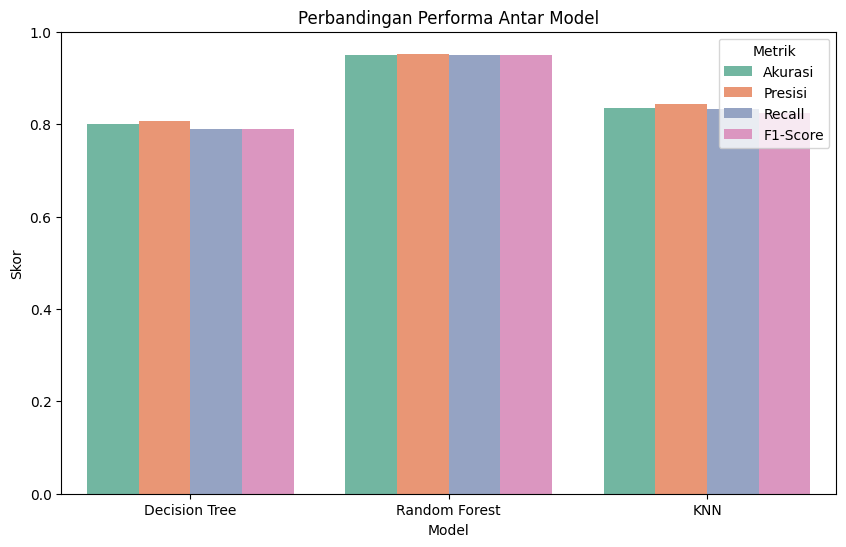

In [61]:
# Visualisasi perbandingan performa
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="value", hue="variable",
            data=pd.melt(results_df, id_vars=["Model"]),
            palette="Set2")
plt.title("Perbandingan Performa Antar Model")
plt.ylabel("Skor")
plt.ylim(0, 1)
plt.legend(title="Metrik")
plt.show()


Berdasarkan hasil evaluasi, dapat dilihat bahwa setiap algoritma memiliki keunggulan masing-masing diantaranya sebagai berikut

- **Random Forest** menunjukkan performa paling stabil dengan skor F1 yang tinggi, menunjukkan kemampuannya dalam mengatasi overfitting dan memberikan prediksi yang seimbang.
- **Decision Tree**. Di percobaan awal, algoritma ini sempat mengalami overfitting. Tapi setelah menggunakan pruning, performa model jadi lebih stabil.
- **KNN** memiliki performa yang baik tergantung pada pemilihan nilai k dan skala data.

Pemilihan model akhir sebaiknya mempertimbangkan trade-off antara kompleksitas, interpretabilitas, dan performa.
